<a href="https://colab.research.google.com/github/aml7hawaiiedu/CCAPLandCoverProject/blob/main/Image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('gdalutils')
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘gdalutils’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this packag

# New Section

In [2]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)
library(zip)

Linking to GEOS 3.10.2, GDAL 3.4.3, PROJ 8.2.1; sf_use_s2() is TRUE

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)


Attaching package: ‘zip’


The following objects are masked from ‘package:utils’:

    unzip, zip




In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=b34685e42d99ab3e6eb8f548a1c82295&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbE9VUTRXV0NueWRHQVZXNmU4VERVUFlCbmxFd0dOVXNkMnFuMFdieWZ5RFZNS25sY1plZ0RScVU5OGpUQnlkUSIsInN0YXRlIjoiYjM0Njg1ZTQyZDk5YWIzZTZlYjhmNTQ4YTFjODIyOTUifQ==


In [17]:
# Hawaii
# Kahoolawe
# Kauai
# Lanai
# Maui - running on 9/13/23
# Molokai - ran on 9/12/23 - complete
# Niihau - running on 9/13/23 - complete
# Oahu

In [19]:
# dir.create('/content/Hawaii10/') # 2010_Hawaii_CCAP # 2010_Hawaii_LS

# dir.create('/content/Kauai10/') # 2010_Kauai_CCAP # 2010_Kauai_LS

# dir.create('/content/Lanai11/') # 2011_Lanai_CCAP # 2011_Lanai_LS

dir.create('/content/Maui10/') # 2010_Maui_CCAP # 2010_Maui_LS

# dir.create('/content/Molokai10/') # 2010_Molokai_CCAP # 2010_Molokai_LS

# dir.create('/content/Niihau10/') # 2010_Niihau_CCAP # 2010_Niihau_LS

# dir.create('/content/Oahu11/') # 2011_Oahu_CCAP # 2011_Oahu_LS


Warning message in dir.create("/content/Maui10/"):
“'/content/Maui10' already exists”


In [20]:
# 2010 links

# # Hawaii
# # CCAP: https://drive.google.com/file/d/1XCDP3YsKnNCYlRzDhc8eFJcqjwdqnJRq/view?usp=drive_link
# drive_download(file = as_id('1XCDP3YsKnNCYlRzDhc8eFJcqjwdqnJRq'), path =  '/content/Hawaii10/2010_Hawaii_CCAP.tif', overwrite = FALSE)
# # LS: https://drive.google.com/file/d/1LmwA6ZtjEow88W3Z8qfpI5m7fMQIub3R/view?usp=drive_link
# drive_download(file = as_id('1LmwA6ZtjEow88W3Z8qfpI5m7fMQIub3R'), path =  '/content/Hawaii10/2010_Hawaii_LS.tif', overwrite = TRUE)

# # Kauai
# # CCAP: https://drive.google.com/file/d/1MUWJ0Z-Ah70wCw5HqNxuienaBwv_JrZw/view?usp=drive_link
# drive_download(file = as_id('1MUWJ0Z-Ah70wCw5HqNxuienaBwv_JrZw'), path =  '/content/Kauai10/2010_Kauai_CCAP.tif', overwrite = FALSE)
# # LS: https://drive.google.com/file/d/16KTC9sI9r6axepiTldB4DukJa0LY3vPA/view?usp=drive_link
# drive_download(file = as_id('16KTC9sI9r6axepiTldB4DukJa0LY3vPA'), path =  '/content/Kauai10/2010_Kauai_LS.tif', overwrite = TRUE)

# Maui
# CCAP: https://drive.google.com/file/d/1O5P-KiSkhYQJf9xrlQy5MaNFhPnZaHfW/view?usp=drive_link
drive_download(file = as_id('1O5P-KiSkhYQJf9xrlQy5MaNFhPnZaHfW'), path =  '/content/Maui10/2010_Maui_CCAP.tif', overwrite = FALSE)
# LS: https://drive.google.com/file/d/1l6uupFsFhsoPDgpvH-jG82Ke5kWltNXj/view?usp=drive_link
drive_download(file = as_id('1l6uupFsFhsoPDgpvH-jG82Ke5kWltNXj'), path =  '/content/Maui10/2010_Maui_LS.tif', overwrite = TRUE)

# # Molokai
# # CCAP: https://drive.google.com/file/d/1XFW3OI6wDV1szxZLVhce1D5swgJikNkh/view?usp=drive_link
# drive_download(file = as_id('1XFW3OI6wDV1szxZLVhce1D5swgJikNkh'), path =  '/content/Molokai10/2010_Molokai_CCAP.tif', overwrite = FALSE)
# # LS: https://drive.google.com/file/d/1mag4v9ylMeLdcswfebCGpliLPHR3giSx/view?usp=drive_link
# drive_download(file = as_id('1mag4v9ylMeLdcswfebCGpliLPHR3giSx'), path =  '/content/Molokai10/2010_Molokai_LS.tif', overwrite = TRUE)

# # Niihau
# # CCAP: https://drive.google.com/file/d/1lVWMN_qmcVU-WhgPTNXMnU5PUy6XUBPP/view?usp=drive_link
# drive_download(file = as_id('1lVWMN_qmcVU-WhgPTNXMnU5PUy6XUBPP'), path =  '/content/Niihau10/2010_Niihau_CCAP.tif', overwrite = FALSE)
# # LS: https://drive.google.com/file/d/1zCXAGEyBnwNdVGf4Xzr3vvMC3wQ91uMq/view?usp=drive_link
# drive_download(file = as_id('1zCXAGEyBnwNdVGf4Xzr3vvMC3wQ91uMq'), path =  '/content/Niihau10/2010_Niihau_LS.tif', overwrite = TRUE)


File downloaded:

• hi_maui_2010_ccap_hr_land_cover_20150213.img
  <id: 1O5P-KiSkhYQJf9xrlQy5MaNFhPnZaHfW>

Saved locally as:

• /content/Maui10/2010_Maui_CCAP.tif

File downloaded:

• Maui_06-09.tif <id: 1l6uupFsFhsoPDgpvH-jG82Ke5kWltNXj>

Saved locally as:

• /content/Maui10/2010_Maui_LS.tif



In [21]:
# 2005 links

# # Hawaii
# # CCAP: https://drive.google.com/file/d/1alePZ56pp-Z7FmayRAkACT3y-kwty6W3/view?usp=drive_link
# drive_download(file = as_id('1alePZ56pp-Z7FmayRAkACT3y-kwty6W3'), path =  '/content/Hawaii/2005_Hawaii_CCAP.tif', overwrite = FALSE)
# # LS: https://drive.google.com/file/d/1OJWmvCpa3pCR8RA2erqKdIrNx9UrNG2S/view?usp=drive_link
# drive_download(file = as_id('1OJWmvCpa3pCR8RA2erqKdIrNx9UrNG2S'), path =  '/content/Hawaii/2005_Hawaii_LS.tif', overwrite = TRUE)

# # Kauai
# # CCAP: https://drive.google.com/file/d/1LvFnOVel0exNQl_N56CPBe05YQK5xrm2/view?usp=drive_link
# drive_download(file = as_id('1LvFnOVel0exNQl_N56CPBe05YQK5xrm2'), path =  '/content/Kauai/2005_Kauai_CCAP.tif', overwrite = FALSE)
# # LS: https://drive.google.com/file/d/1LJ6QSVenPmYVy6Xb6PnxbBtAtcihq26a/view?usp=drive_link
# drive_download(file = as_id('1LJ6QSVenPmYVy6Xb6PnxbBtAtcihq26a'), path =  '/content/Kauai/2005_Kauai_LS.tif', overwrite = TRUE)

# # Lanai
# # CCAP: https://drive.google.com/file/d/1WpOA_We5K5rKB6g9Yi9xJ0xvFeamXme0/view?usp=drive_link
# drive_download(file = as_id('1WpOA_We5K5rKB6g9Yi9xJ0xvFeamXme0'), path =  '/content/Lanai/2005_Lanai_CCAP.tif', overwrite = FALSE)
# # LS: https://drive.google.com/file/d/1eY5rbM6sJZzRTCn-h7DVXB8QslVVjcOO/view?usp=drive_link
# drive_download(file = as_id('1eY5rbM6sJZzRTCn-h7DVXB8QslVVjcOO'), path =  '/content/Lanai/2005_Lanai_LS.tif', overwrite = TRUE)

# # Maui
# # CCAP: https://drive.google.com/file/d/1Zad7crYgAO6TywmxZ8bUof3XdBobNTX9/view?usp=drive_link
# drive_download(file = as_id('1Zad7crYgAO6TywmxZ8bUof3XdBobNTX9'), path =  '/content/Maui/2005_Maui_CCAP.tif', overwrite = FALSE)
# # LS: https://drive.google.com/file/d/1wmSLERJJV4geHFzsUv8hMDWbO7TX4zVr/view?usp=drive_link
# drive_download(file = as_id('1wmSLERJJV4geHFzsUv8hMDWbO7TX4zVr'), path =  '/content/Maui/2005_Maui_LS.tif', overwrite = TRUE)

# Molokai
# # CCAP: https://drive.google.com/file/d/1DcyMGYwQ538ZeKCXJDbPFjI4F4mZrdUM/view?usp=drive_link
# drive_download(file = as_id('1DcyMGYwQ538ZeKCXJDbPFjI4F4mZrdUM'), path =  '/content/Molokai/2005_Molokai_CCAP.tif', overwrite = FALSE)
# # LS: https://drive.google.com/file/d/1-oSCrCd2KWYnqLAin_TzjxIKJTBueQeL/view?usp=drive_link
# drive_download(file = as_id('1-oSCrCd2KWYnqLAin_TzjxIKJTBueQeL'), path =  '/content/Molokai/2005_Molokai_LS.tif', overwrite = TRUE)

# # Niihau
# # CCAP: https://drive.google.com/file/d/1DByagFnHZbFeMyGtVSBj1biXkAy0h__w/view?usp=drive_link
# drive_download(file = as_id('1DByagFnHZbFeMyGtVSBj1biXkAy0h__w'), path =  '/content/Niihau/2005_Niihau_CCAP.tif', overwrite = FALSE)
# # LS: https://drive.google.com/file/d/17cvOubTQUCC49r8gFasfQLd5s0YiZKoo/view?usp=drive_link
# drive_download(file = as_id('17cvOubTQUCC49r8gFasfQLd5s0YiZKoo'), path =  '/content/Niihau/2005_Niihau_LS.tif', overwrite = TRUE)

# # Oahu
# # CCAP: https://drive.google.com/file/d/1bILhjVbU4EN-pQUvgnOxW_WXW9WJ5U3y/view?usp=drive_link
# drive_download(file = as_id('1bILhjVbU4EN-pQUvgnOxW_WXW9WJ5U3y'), path =  '/content/Oahu/2005_Oahu_CCAP.tif', overwrite = FALSE)
# # LS: https://drive.google.com/file/d/1ofXyec-OTqfWhy6Qjh69kXDpezIShWiK/view?usp=drive_link
# drive_download(file = as_id('1ofXyec-OTqfWhy6Qjh69kXDpezIShWiK'), path =  '/content/Oahu/2005_Oahu_LS.tif', overwrite = TRUE)

In [22]:
ccap_raster <- stack('/content/Maui10/2010_Maui_CCAP.tif')
ls_raster <- stack('/content/Maui10/2010_Maui_LS.tif')

In [23]:
ls_raster_extended <- extend(ls_raster, projectExtent(ccap_raster, ls_raster), value=NA)

In [24]:
ccap_raster
ls_raster

class      : RasterStack 
dimensions : 20986, 32476, 681541336, 1  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 739325.6, 817268, 2277248, 2327614  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
names      : Class.Name 
min values :          0 
max values :         22 


class      : RasterStack 
dimensions : 2375, 3078, 7310250, 7  (nrow, ncol, ncell, nlayers)
resolution : 0.0002694946, 0.0002694946  (x, y)
extent     : -156.7561, -155.9266, 20.45275, 21.0928  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 
names      : Blue, Green, Red, NIR, SWIR1, SWIR2, pixel_qa 


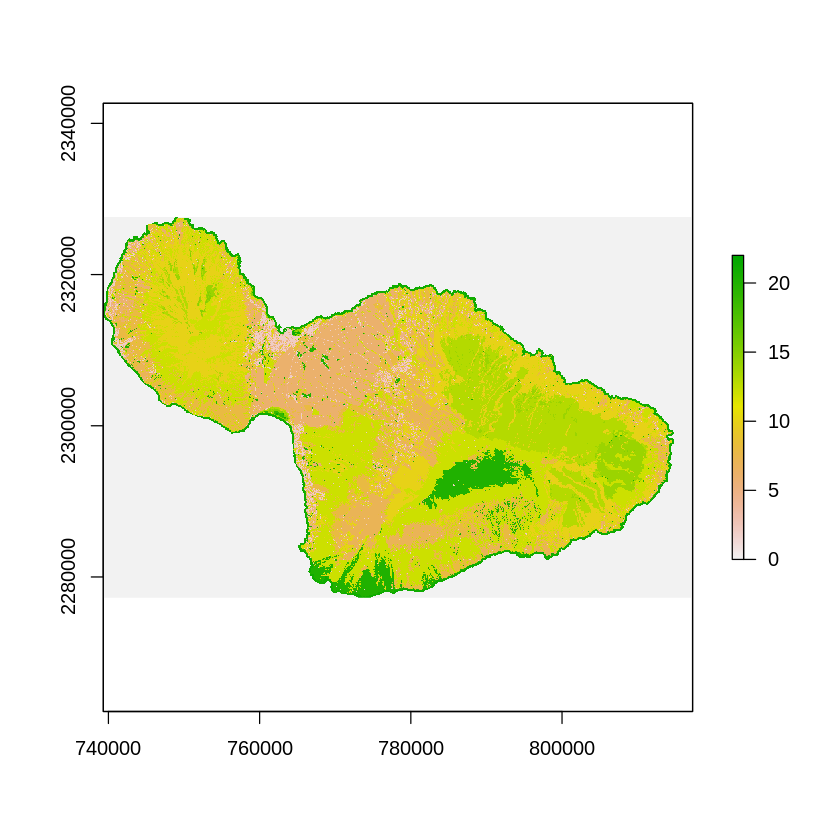

In [25]:
ccap_raster %>% plot

In [26]:
ncol(ccap_raster)

nrow(ccap_raster)


y_end <- c(seq(1,ccap_raster %>% nrow,512),nrow(ccap_raster))[-1]
x_end <- c(seq(1,ccap_raster %>% ncol,512),ncol(ccap_raster))[-1]

extract_grid <- expand.grid(x_end,y_end) %>% data.table

names(extract_grid) <- c('x_end','y_end')

extract_grid$x_org <- extract_grid$x_end - 512
extract_grid$y_org <- extract_grid$y_end - 512

extract_grid$id <- 1:nrow(extract_grid)

[1] 32476

[1] 20986

In [27]:

# dir.create('/TrainingData/Niihau')
# Specify the path for the new folder/directory
new_folder_path <- "/content/Maui10/Images"
new_folder_path2 <- "/content/Maui10/Labels"
# Use dir.create to create the new folder
dir.create(new_folder_path, showWarnings = FALSE)

# Check if the folder was created successfully
if (file.exists(new_folder_path)) {
  cat("Folder created:", new_folder_path, "\n")
} else {
  cat("Failed to create folder:", new_folder_path, "\n")
}


# Use dir.create to create the new folder
dir.create(new_folder_path2, showWarnings = FALSE)
# Check if the folder was created successfully
if (file.exists(new_folder_path2)) {
  cat("Folder created:", new_folder_path2, "\n")
} else {
  cat("Failed to create folder:", new_folder_path2, "\n")
}

Folder created: /content/Maui10/Images 
Folder created: /content/Maui10/Labels 


In [28]:
result_dt <-
1:nrow(extract_grid) %>% lapply(function(x){

  nrow <- 0
  ncol <- 0
  i <- 0
  while(nrow !=512 | ncol != 512){
    i <- i + 1
    # Calculate the geographic coordinates for the cropping extent
    xmin <- xFromCol(ccap_raster, extract_grid[x,]$x_org) + rnorm(1)*.01*2.4
    xmax <- xFromCol(ccap_raster, extract_grid[x,]$x_end) + rnorm(1)*.01*2.4
    ymin <- yFromRow(ccap_raster, extract_grid[x,]$y_end) + rnorm(1)*.01*2.4 # Note row_max as raster origin is top-left
    ymax <- yFromRow(ccap_raster, extract_grid[x,]$y_org) + rnorm(1)*.01*2.4 # Note row_min as raster origin is top-left

    e <- extent(xmin, xmax, ymin, ymax)

    ccap_cropped_raster <- crop(ccap_raster, e)

    nrow <- nrow(ccap_cropped_raster)
    ncol <- ncol(ccap_cropped_raster)


    # print(dim(ccap_cropped_raster))
    if(i>1000){return('failed to converge')}
    }

  ls_cropped_raster <- crop(ls_raster_extended, projectExtent(ccap_cropped_raster,ls_raster))

  ls_resampled_raster <- projectRaster(ls_cropped_raster,ccap_cropped_raster)
  print(ls_resampled_raster)
  pixel_table <- (table(values(ccap_cropped_raster))/ncell(ccap_cropped_raster)) %>% data.table

  names(pixel_table) <- c('label','percent')

  out_dt <- data.table(extract_grid[x,],xmin = xmin,xmax =xmax,ymin= ymin,ymax, pixel_table)

  if(ls_resampled_raster %>% nrow ==512 & ls_resampled_raster %>% ncol ==512 & ccap_cropped_raster%>% nrow ==512 & ccap_cropped_raster%>% ncol ==512){
    ls_resampled_raster %>%
    writeRaster(., paste("/content/Maui10/Images/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)

    ccap_cropped_raster %>%
    writeRaster(., paste("/content/Maui10/Labels/",extract_grid[x,]$x_org,'_',extract_grid[x,]$y_org,'.tif',sep=''),overwrite=T)
  }else(print('uh oh'))

  return(out_dt)
})
result_dt[ result_dt %>% lapply(function(x){is.data.table(x)}) %>% unlist] %>% rbindlist %>%
fwrite("/content/Maui10/Maui10.csv") # /content/Maui10/

result_dt[ result_dt %>% lapply(function(x){is.data.table(x)}) %>% unlist] %>% rbindlist %>%
fwrite("/content/Maui10.csv") # make a copy outside of the zip folder too

class      : RasterBrick 
dimensions : 512, 512, 262144, 7  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 739328, 740556.8, 2326383, 2327612  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
source     : memory
names      :     Blue,    Green,      Red,      NIR,    SWIR1,    SWIR2, pixel_qa 
min values : 322.9347, 276.5382, 206.4085, 553.7491, 370.0355, 277.2806,  68.0000 
max values : 501.6222, 438.2178, 374.9989, 685.0205, 506.1675, 397.6836,  68.0000 

class      : RasterBrick 
dimensions : 512, 512, 262144, 7  (nrow, ncol, ncell, nlayers)
resolution : 2.4, 2.4  (x, y)
extent     : 740554.4, 741783.2, 2326383, 2327612  (xmin, xmax, ymin, ymax)
crs        : +proj=utm +zone=4 +datum=WGS84 +units=m +no_defs 
source     : memory
names      :     Blue,    Green,      Red,      NIR,    SWIR1,    SWIR2, pixel_qa 
min values : 335.3141, 285.5079, 217.6389, 553.9481, 370.0089, 265.5150,  68.0000 
max values : 539.8824, 441.275

In [29]:
zip(zipfile = "/content/Maui10.zip", files = "/content/Maui10")

Warning message in fix_absolute_paths(data$key):
“Dropping leading `/` from paths, all paths in a zip file must be relative paths.”


In [30]:
# revised_trainingdata https://drive.google.com/drive/folders/1s7g2RtSXxgH6l1PdZGQwkGn7AGPueGB5?usp=drive_link
drive_upload(media = "/content/Maui10.zip", path = as_id("1s7g2RtSXxgH6l1PdZGQwkGn7AGPueGB5"))

Auto-refreshing stale OAuth token.

Local file:

• /content/Maui10.zip

Uploaded into Drive file:

• Maui10.zip <id: 1d2tmRHPWxIoWZo68q6GWmCXyf1mqWFki>

With MIME type:

• application/zip

